# PROJET DU TRAITEMENT DE SIGNAL

## ***Projet Escape No Game : livrable 3***

***GROUPE 7***: MATTENBERGER Lou, BARAKAT Yanis et SOBHI Achraf

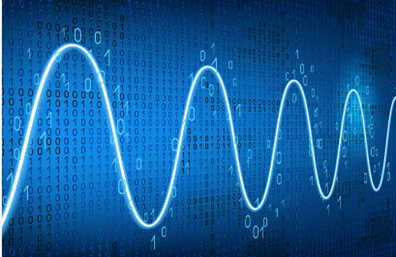
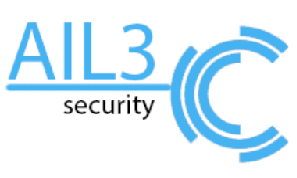

# **CAHIER DES CHARGES**

***QUI SOMMES-NOUS ?***



Bienvenue chez le département de recherche et développement de l’agence AIL3C (Agence Indépendante de Lutte Contre la Cybercriminalité).


Lorsque nous nous sommes lancés sur ce projet en 2022, nous avons cherché à fournir à nos clients les meilleurs outils contre la lutte de la cybercriminalité. 


C’est pourquoi ce département met tout en œuvre pour offrir le top du top pour satisfaire leurs besoins.

***QUEL EST NOTRE MISSION?***

Comme dit plus tôt, notre mission est de développer des solutions innovantes permettant à nos agents sur le terrain de se battre contre la cybercriminalité et s’en sortir peu importe le contexte auquel ils font face.

***LA RAISON DE NOTRE PROJET***

Après la malheureuse perte du défunt agent K57, nous avons décidé de chercher un moyen qui permettrait à nos agents de réaliser des missions d’infiltration dans des conditions encore meilleure leur offrant ainsi la possibilité mieux les réussir et de retourner auprès de leurs familles après celles-ci.

***PROBLEMATIQUE DU LIVRABLE***

Comment pouvoir communiquer vers l’extérieur dans des conditions similaires à celles de l’agent K57 ?

***CONTRAINTES***

Le seul accessoire disponible dans la salle était un micro branché au système d'audioconférence uniquement connecté au réseau lors de l'utilisation de la salle.

# **LIVRABLE 4**

Pour la réalisation de ce livrable, nous avons élaboré un code pyhton afin d'envoyer un message et de le recevoir avec différentes étapes :



- Transformer le message en binaire 



- L'encodage du message en Manchester




- Moduler le siganl en ASK ou FSK



- Démodulation ASK ou FSK




- Décodage en Manchester






- Transformer le message binaire en une chaine de caractères 



## Première partie du code

**IMPORTATION DES BIBLIOTHEQUES** 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import socket
import sounddevice as sd
from scipy.io.wavfile import write

**PASSAGE D'UNE CHAINE DE CARACTERERS  AU BINAIRE**

In [ ]:
#Création d'une entrée qui permet d'écrire le message 
msg=input("message à entrer :") 
def toBinary(msg):              #Fonction servant à traduire les caractères en nombres binaires
    l,m=[],[]
    for i in msg :
        l.append(ord(i))
    for i in l :
        m.append(int(bin(i)[2:]))
    return m

sos=[]                          #Initialisation de la liste dans le but de placer les nombres binaires crées
bin=toBinary(msg)
for l in bin:
    for z in range(8-len(str(l))):
        sos.append(0)
    for c in str(l):
        sos.append(int(c))
print(sos)

#Note : Il faut relancer l'ensemble du programme sinon la prochaine traduction ne démarre pas

**CRC**

In [ ]:
#création d'une fonction xor
def xor(a, b):

    # initialisation d'une liste resultat
    resultat = []
    
    for i in range(1, len(b)):
        if a[i] == b[i]:
            resultat.append('0')
        else:
            resultat.append('1')

    return ''.join(resultat)


#création d'une fonction division modulo 2
def mod2div(divident, divisor):

    # Nombre de bit devant subir le 'ou exclusif'
    pick = len(divisor)

    
    tmp = divident[0 : pick]

    while pick < len(divident):

        if tmp[0] == '1':

            # remplacerment le divident par le résultat du xor et 
            #soustraction d'1 bit
            tmp = xor(divisor, tmp) + divident[pick]

        else: 

            # Si le bit le plus à gauche du dividende vaut 0,
            # impossible d'utiliser un "diviseur régulier" donc
            # utilisation d'un diviseur composé uniquement de 0
            tmp = xor('0'*pick, tmp) + divident[pick]

        #incrémenter 'pick' pour continuer
        pick += 1

    # Pour les derniers n bits,
    #réaliser la division normalement
    #car risque de donner un résultat erroné
    if tmp[0] == '1':
        tmp = xor(divisor, tmp)
    else:
        tmp = xor('0'*pick, tmp)

    checkword = tmp
    return checkword

#Fonction pour encoder les données
# en prenant en compte le reste de la division
# et en le rajoutant dans les données
def encodeData(data, key):

    l_key = len(key)

    #Ajouter (n-1) 0 à la fin des données
    appended_data = data + '0'*(l_key-1)
    remainder = mod2div(appended_data, key)
    #Ajouter le reste dans les données
    codeword = remainder
    return codeword
    
key = '1001'
data = ""
for element in sos :
    data+=str(element)
print(data)
CRC = encodeData(data,key)
CRC=list(CRC)
print("Données codées à utiliser sous format binaire :",CRC)

**PREPARATION DE LA TRAME**

In [ ]:
Fanion = 0,1,1,0,1,0,1,1                     #création d'un fanion d'1 octet
Adresse = 0,1,1,0,1,1,1,1                    #création d'un fanion d'1 octet
Controle = 0,1,1,1,0,0,0,0                   #création d'un controle d'1 octet
Protocole = 0,0,1,1,1,1,1,0,1,1,1,0,0,0,1,0  #création d'un protocole de 2 octets

**TRAME**

In [ ]:
Trame = []               #Initialisation d'une liste pour la trame

Trame.extend(Fanion)     #Ajout du fanion dans la trame grâce au extend
Trame.extend(Controle)   #Ajout du controle dans la trame grâce au extend
Trame.extend(Protocole)  #Ajout du protocole dans la trame grâce au extend
Trame.extend(sos)        #Ajout du message binaire dans la trame grâce au extend
Trame.extend(CRC)        #Ajout du CRC dans la trame grâce au extend
Trame.extend(Fanion)     #Ajout du fanion dans la trame grâce au extend

print("La matrice binaire de la trame est",Trame) #Visualisation de la trame

**CODAGE DU MESSAGE EN MANCHESTER**

In [ ]:
M= Trame             #Nous considérons que M est égal la trame

Y = [] # Initialisation de la liste

for i in range (0,len(M)):  # Boucle qui va de 0 au nombre total de bits du message
    if M[i]==0:             # Si le bit est 0
 
        Y.append(0)  # Bit de l'information
        Y.append(1)  # Bit de codage (sans réel sens)
 
    else:                         # Si le bit est 1
 
        Y.append(1)  # Bit de l'information
        Y.append(0)  # Bit de codage (sans réel sens)
print("la trame codée en Manchester donne:",Y)

**VALEUR POUR LA MODULATION**

In [ ]:
Fe = 44100                       #  Fréquence d'échantillonnage


baud = 300                       #  Débit souhaité sur le canal de transmission exprimé en bit/s
Nbits = len(Y)                   #  Nombre de bits initial (taille du message M)
Ns = round(Fe/baud)              #  Nombre de symboles par bit (Fréq d'echan / Débit binaire) 
N = Ns*Nbits

**MODULATION DU MESSAGE**

In [ ]:
#Création d'une entrée afin de laisser l'utilisateur choisir quelle modulation il souhaite
option=int(input('Appuyez sur 1 si vous souhaitez utiliser la modulation ASK  \nAppuyez sur 2 si vous souhaitez utiliser la modulation FSK \n\t Merci de choisir:--\n'))

if(option==1):
    #Génération du message binaire dupliqué
    Codeman = np.repeat(Y,Ns)  
    #Génération le vecteur temps
    t = np.arange(0,N/Fe,1/Fe)
    #Génération la porteuse P(t)
    Ap = 1                              
    Fp = 17000                           
    Porteuse = Ap*np.sin(2*np.pi*Fp*t)
    #Réalisation de la modualtion en ASK 
    ASK=[]                    #Initialisation de la liste ASK
    ASK = Porteuse*Codeman          
    
    #Affichage du message CodeMan(t)
    plt.figure (figsize = (10,6))
    plt.plot(t,Codeman,'black')
    plt.title('Message M(t)')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()
   
    #Affichage de la porteuse P(t)
    plt.figure (figsize = (10,6))
    plt.plot(t,Porteuse,'b')
    plt.title('Porteuse P(t)')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    
    #Affichage du résultat de la modualtion ASK(t)
    plt.figure (figsize = (10,6))
    plt.plot(t,ASK,'r')
    plt.title('Modualtion ASK(t)')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    
    #Lecture et téléchargement du fichier audio 
    sd.play(z,Fe)       
    z=np.asarray(ASK,np.float32)
    write("ASK.wav",Fe,z)  
    #Le fichier se trouve dans le même chemin que le programme
    #Et s'appelle "ASK.wav"
elif(option==2):
    #Génération du message binaire dupliqué
    Codeman = np.repeat(Y,Ns)    
    #Génération le vecteur temps
    t = np.arange(0,N/Fe,1/Fe)
    #Génération des 2 porteuse P1 pour le bit 1 et P2 pour le bit 0
    A1 = 1                      #Amplitude de la porteuse 1 du bit 1                
    A2 = 1                      #Amplitude de la porteuse 2 du bit 0
    fp1 = 17000                 #fréquence de la porteuse du bit 1
    fp2 = 1500                  #fréquence de la porteuse porteuse du bit 0
    #Génération des porteuses d'une longueur correspondant à Ns
    P1 = A1*np.sin(2*np.pi*fp1*t)     #porteuse du bit  1                   
    P2 = A2*np.sin(2*np.pi*fp2*t)     #Porteuse du bits 0 
    
    #Réalisation de la modulation FSK 
    FSK = []                     #Initialisation d'une liste nommée FSK           
    FSK = [P1[x] if Codeman[x] else P2[x] for x in range(len(Codeman))] 
    
    #Affichage du message CodeMan(t)
    plt.figure (figsize = (20,12))
    plt.plot(t,Codeman,'black')
    plt.title('Message M(t)')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    #Affichage du résultat de la modualtion FSK(t)
    plt.figure (figsize = (20,12))
    plt.plot(t,FSK,'r')
    plt.title('Modualtion FSK(t)')
    plt.xlabel('temps (s)')
    plt.ylabel('Amplitude')
    plt.grid()
    
    #Lecture et téléchargement du fichier audio 
    z=np.asarray(FSK,np.float32)
    sd.play(z,Fe)
    write("FSK.wav",Fe,z) 
    #Le fichier se trouve dans le même chemin que le programme
    #Et s'appelle "FSK.wav"

**SERVEUR SERVANT A L'ENVOI DU MESSAGE AUDIO**

In [ ]:
#Cette partie peut être ignoré pour directement démoduler le message
#Cette partie du programme nécessite l'utilisation simultanée de la partie "cliente"
#Vous trouverez plus d'information dans le document texte annexe envoyé

s = socket.socket()
host=socket.gethostname()
port=2010
s.bind((host,port))
s.listen(1)
print(host)
print("Merci d'attendre la connexion...")
conn,addr = s.accept()
print(addr,"s'est connecté au serveur!")

filename = input(str("Merci d'entrer le nom de la modulation suivie de '.wav' :"))
file = open(filename,'rb')
file_data = file.read(2000000)
conn.send(file_data)
print("Les données ont été envoyées !")

**DEMODULATION DU MESSAGE**

In [ ]:
#Création d'une entrée afin de laisser l'utilisateur choisir quelle démodulation il souhaite utiliser
option=int(input('Appuyez sur 1 si vous souhaitez utiliser la modulation ASK  \nAppuyez sur 2 si vous souhaitez utiliser la modulation FSK \n\t Merci de choisir:--\n'))
if(option==1):                                           #si 1 est pressé alors :
    S = Porteuse                                         #On considère que S est égale à la porteuse
    Produit = ASK*S                                      #Multiplication de la modulation par S
    Res= []                                              #Initialisation de la liste Res
    i=0
    for i in range(0,N,Ns):                              #Pour i allant de 0 à N avec un pas de Ns      
        Res.append(np.trapz(Produit[i:i+Ns],t[i:i+Ns]))  #Intégration par la méthode des trapèzes
    
if(option==2):                                           #si 2 est pressé alors
    S1=P1                                                #On considère que S1 vaut P1
    S2=P2                                                #On considère que S2 vaut P2
    Produit1=FSK*S1                                      #Produit de la modulation FSK1 par S1
    Produit2=FSK*S2                                      #Produit de la modulation FSK2 par S2
    Res1= []                                             #Initialisation de la liste Res1                             
    Res2= []                                             #Initialisation de la liste Res2
    i=0
    for i in range(0,N,Ns):                              #Pour i allant de 0 à N avec un pas de Ns   
        Res1.append(np.trapz(Produit1[i:i+Ns],t[i:i+Ns]))#Intégration par la méthode des trapèzes
        Res2.append(np.trapz(Produit2[i:i+Ns],t[i:i+Ns]))

In [ ]:
#Création d'une entrée afin de laisser l'utilisateur choisir quelle démodulation il souhaite utiliser
option=int(input('Appuyez sur 1 si vous souhaitez utiliser la modulation ASK  \nAppuyez sur 2 si vous souhaitez utiliser la modulation FSK \n\t Merci de choisir:--\n'))

if(option==1):
                                                 # Initialiser une liste pour stocker le message démodulé
    message_demodule_ASK= []
    for ii in range (0,len(Res)):
        # si Res > 0 donc on a reçu un 1 (True) sinon un 0 (False)
        if Res[ii] > 0:
            message_demodule_ASK.append(1) 
        if Res[ii] <= 0:
            message_demodule_ASK.append(0)

if(option==2):
    message_demodule_FSK= []                      # Initialiser une liste pour stocker le message démodulé
    for ii in range (0,len(Res1)): 
        # Si abs(y1) > abs(y2) alors on a reçu un 1 (True), sinon un 0 (False) 
        if abs(Res1[ii]) > abs(Res2[ii]):
            message_demodule_FSK.append(1) 
        else:
            message_demodule_FSK.append(0)

**DECODAGE MANCHESTER**

In [ ]:
#Création d'une entrée afin de laisser l'utilisateur choisir quelle démodulation il va décoder
option=int(input('Appuyez sur 1 si vous souhaitez utiliser la modulation ASK  \nAppuyez sur 2 si vous souhaitez utiliser la modulation FSK \n\t Merci de choisir:--\n'))

if(option==1):
    message_reçu_bin = [int(message_demodule_ASK[i]) for i in range(0, len(message_demodule_ASK), 2)]    #suppression d'un bit sur 2 dans la liste
    print ("Les données decodées en Manchester pour l'ASK donnent:", message_reçu_bin)                   #Affichage du message décodée 

if(option==2):
    message_reçu_bin = [int(message_demodule_FSK[i]) for i in range(0, len(message_demodule_FSK), 2)]    #suppression d'un bit sur 2 dans la liste
    print ("Les données decodées en Manchester pour le FSK donnent:", message_reçu_bin)                  #Affichage du message décodée

**RECUPERATION DU MESSAGE BINAIRE**

In [ ]:
message = message_reçu_bin[32:len(message_reçu_bin)-len(CRC)-8]
#Suppression du fanion,de l'adresse, du controle, du protocole et du CRC

**PASSAGE DU BINAIRE A LA CHAINE DE CARACTERE**

In [ ]:
# Ecrire la suite binaire du message dans une chaine de caractères (char) (résultat sous la forme par exmeple '001010111'
bin_data = ""
for elem in message:  
    bin_data += str(elem)

# Initialisation d'une chaîne vide pour stocker les données reçues
data_reçu =' '

# Conversion binaire ==> décimal)
def BinaryToDecimal(binary):  
    binary1 = binary 
    decimal, i, n = 0, 0, 0    # Initialisation des variables
    
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)


    # Découpage des données binaire d'entrée et convertion en décimal puis en chaîne par bloc de 8 
for i in range(0, len(bin_data), 8): 
    # découper le bin_data de la plage d'index [0, 7] (car un caractère ASCII est codé sur 7 bits) 
    # et le stocker sous forme d'entier dans temp_data
    temp_data = int(bin_data[i+1:i+8])
       # Passer (temp_data) dans la fonction BinarytoDecimal ()
    # pour obtenir la valeur décimale correspondante de (temp_data)
    decimal_data = BinaryToDecimal(temp_data)


    # Décodage de la valeur décimale renvoyée par la Fonction BinarytoDecimal (), en utilisant chr ()
    # fonction qui renvoie la chaîne correspondante pour une valeur ASCII donnée et le résultat est enregistré dans data_recu
    data_reçu = data_reçu + chr(decimal_data) 

# Affichage du resultat 
print("Le message reçu est :", 
      data_reçu)